In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
plt.rcParams['font.size'] = '17'

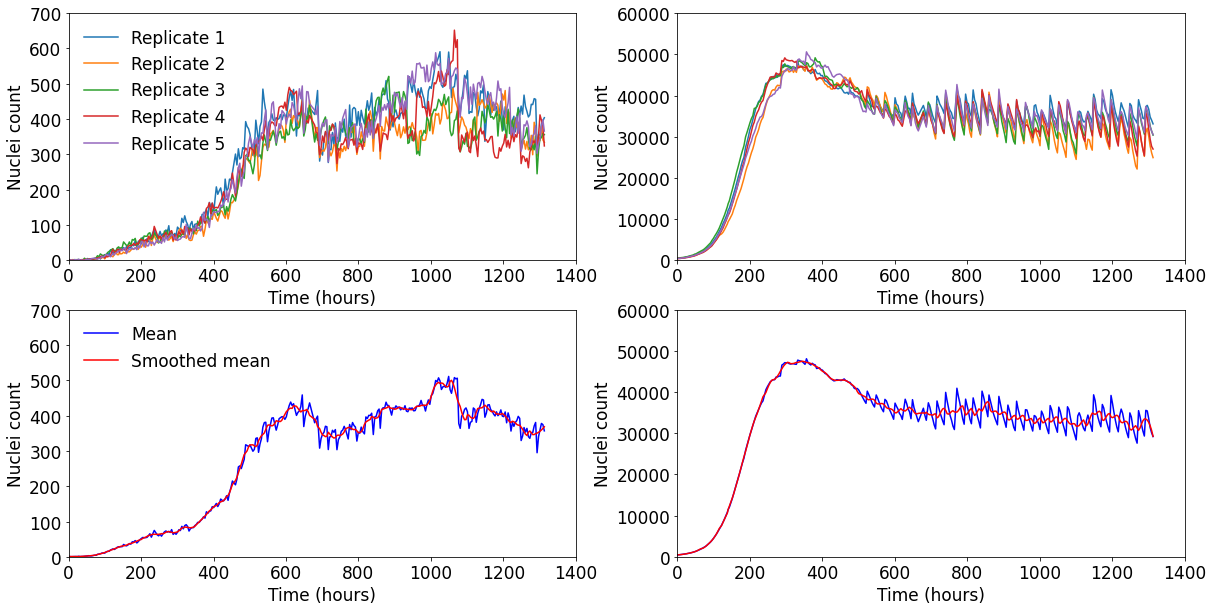

In [2]:
giant_data = np.loadtxt('./Data/giant.csv')
small_data = np.loadtxt('./Data/small.csv')
mean_data = np.mean(np.delete(giant_data,0,1),axis=1)
giant_mean = np.stack([giant_data.T[0], mean_data])
mean_data = np.mean(np.delete(small_data,0,1),axis=1)
small_mean = np.stack([small_data.T[0], mean_data])
small_smooth = savgol_filter(small_mean[1], 13, 3) # window size 51, polynomial order 3
giant_smooth = savgol_filter(giant_mean[1], 13, 3) # window size 51, polynomial order 3
fig, axes = plt.subplots(2,2, figsize=(20, 10))
ax1 = axes[0][0]
for i in range(1,len(giant_data.T)):
    ax1.plot(giant_data.T[0], giant_data.T[i],'-',label='Replicate '+str(i))
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Nuclei count');
ax1.set_xlim((0,1400))
ax1.set_ylim((0,700))
ax1.legend(loc='upper left',ncol=1,fancybox=False, shadow=False, frameon=False)
ax2 = axes[0][1]
for i in range(1,len(small_data.T)):
    ax2.plot(small_data.T[0], small_data.T[i],'-',label='Replicate '+str(i))
ax2.set_xlabel('Time (hours)')
ax2.set_ylabel('Nuclei count');
ax2.set_xlim((0,1400))
ax2.set_ylim((0,60000))
ax3 = axes[1][0]
ax3.plot(giant_mean[0], giant_mean[1],'-',color='blue',label='Mean')
ax3.plot(giant_mean[0], giant_smooth,'-',color='red',label='Smoothed mean')
ax3.set_xlabel('Time (hours)')
ax3.set_ylabel('Nuclei count');
ax3.set_xlim((0,1400))
ax3.set_ylim((0,700))
ax3.legend(loc='upper left',ncol=1,fancybox=False, shadow=False, frameon=False)
ax4 = axes[1][1]
ax4.plot(small_mean[0], small_mean[1],'-',color='blue')
ax4.plot(small_mean[0], small_smooth,'-',color='red')
ax4.set_xlabel('Time (hours)')
ax4.set_ylabel('Nuclei count');
ax4.set_xlim((0,1400))
ax4.set_ylim((0,60000))
plt.savefig('cells_data.pdf')
plt.show()